In [1]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
temp_fn = 'temperature/CEOP_AP_Himalayas_Pyramid_sfc.nc'
temp_ds = xr.open_dataset(temp_fn)

/srv/conda/envs/mintpy/lib/python3.11/site-packages/xarray/conventions.py:286: SerializationWarning: variable 'surface_air_pressure_flag' has multiple fill values {'M', b'M'} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/srv/conda/envs/mintpy/lib/python3.11/site-packages/xarray/conventions.py:286: SerializationWarning: variable 'air_temperature_flag' has multiple fill values {'M', b'M'} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/srv/conda/envs/mintpy/lib/python3.11/site-packages/xarray/conventions.py:286: SerializationWarning: variable 'dew_point_temperature_flag' has multiple fill values {'M', b'M'} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/srv/conda/envs/mintpy/lib/python3.11/site-packages/xarray/conventions.py:286: SerializationWarning: variable 'relative_humidity_flag' has multiple fill values {'M', b'M'} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/srv/conda/

In [3]:
temp_ds['air_temperature_C'] = temp_ds['air_temperature'] - 273.15

In [43]:
# mean daily max temperature
daily_max_temp = temp_ds.air_temperature_C.groupby(temp_ds.time.dt.date).max()
daily_mean_temp = temp_ds.air_temperature_C.groupby(temp_ds.time.dt.date).mean()
daily_min_temp = temp_ds.air_temperature_C.groupby(temp_ds.time.dt.date).min()
#mean_daily_max_temp = daily_max_temp.groupby(daily_max_temp.date.astype('datetime64').dt.dayofyear).mean()
mean_daily_max_temp_per_month = daily_max_temp.groupby(daily_max_temp.date.astype('datetime64').dt.month).mean()
mean_daily_mean_temp_per_month = daily_mean_temp.groupby(daily_mean_temp.date.astype('datetime64').dt.month).mean()
mean_daily_min_temp_per_month = daily_min_temp.groupby(daily_min_temp.date.astype('datetime64').dt.month).mean()

# standard deviation
std_daily_max_temp_per_month = daily_max_temp.groupby(daily_max_temp.date.astype('datetime64').dt.month).std()
std_daily_mean_temp_per_month = daily_mean_temp.groupby(daily_mean_temp.date.astype('datetime64').dt.month).std()
std_daily_min_temp_per_month = daily_min_temp.groupby(daily_min_temp.date.astype('datetime64').dt.month).std()

/tmp/ipykernel_1113/3974137947.py:6: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  mean_daily_max_temp_per_month = daily_max_temp.groupby(daily_max_temp.date.astype('datetime64').dt.month).mean()
/tmp/ipykernel_1113/3974137947.py:7: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable

In [27]:
# mean precip per month
monthly_precip  = temp_ds.precipitation_amount.resample(time='M').sum()

/srv/conda/envs/mintpy/lib/python3.11/site-packages/xarray/core/groupby.py:668: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index_grouper = pd.Grouper(


In [44]:
mean_monthly_precip = monthly_precip.groupby(monthly_precip.time.dt.month).mean()
std_monthly_precip = monthly_precip.groupby(monthly_precip.time.dt.month).std()

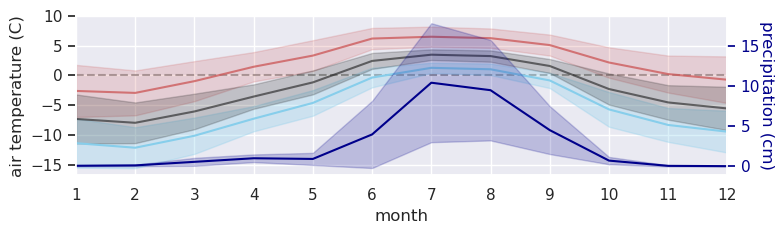

In [76]:
f, ax = plt.subplots(figsize=(8, 2.5))
ax.axhline(0, linestyle='dashed', c='gray', alpha=0.7, zorder=1)
mean_daily_max_temp_per_month.plot(ax=ax, c='indianred', alpha=0.8)
ax.fill_between(months, mean_daily_max_temp_per_month - std_daily_max_temp_per_month, mean_daily_max_temp_per_month + std_daily_max_temp_per_month, color='indianred', alpha=0.2)
mean_daily_min_temp_per_month.plot(ax=ax, c='skyblue')
ax.fill_between(months, mean_daily_min_temp_per_month - std_daily_min_temp_per_month, mean_daily_min_temp_per_month + std_daily_min_temp_per_month, color='skyblue', alpha=0.3)
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
mean_daily_mean_temp_per_month.plot(ax=ax, c='k', alpha=0.6)
ax.fill_between(months, mean_daily_mean_temp_per_month - std_daily_mean_temp_per_month, mean_daily_mean_temp_per_month + std_daily_mean_temp_per_month, color='k', alpha=0.2)
ax2 = ax.twinx()
(mean_monthly_precip/10).plot(ax=ax2, c='darkblue')
ax2.fill_between(months, mean_monthly_precip/10 - std_monthly_precip/10, mean_monthly_precip/10 + std_monthly_precip/10, color='darkblue', alpha=0.2)
ax2.set_ylabel('precipitation (cm)', rotation=270, labelpad=10, color='darkblue')
ax2.tick_params(axis='y', colors='darkblue')
ax2.grid(False)
ax.set_xlim(1, 12)

ax.set_yticks([-15, -10, -5, 0, 5, 10])
ax.set_xticks(months)
ax2.set_title('')
ax.set_ylabel('air temperature (C)')
ax.set_xlabel('month')
ax.set_title('')
f.tight_layout()
f.savefig('figs/climate_plot.png', dpi=300)

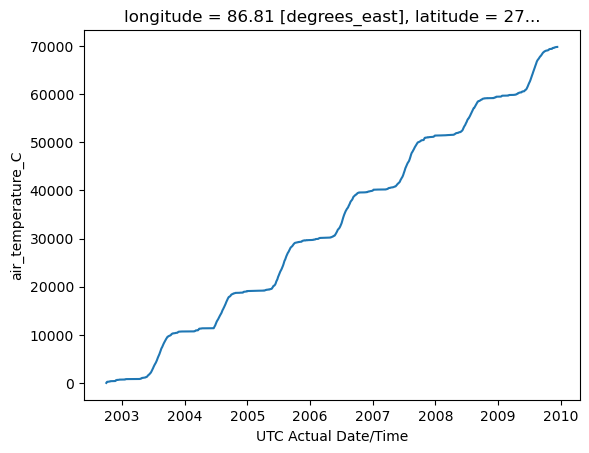

In [79]:
temp_ds_positive.air_temperature_C.cumsum(dim='time').plot()

In [76]:
# median positive degree days per month
# limit to only positive temperatures
temp_ds_positive = temp_ds.where(temp_ds.air_temperature_C > 0, drop=True)
temp_ds_positive['yearly_pdd'] = temp_ds_positive.groupby(temp_ds_positive.time.dt.year).cumsum()['air_temperature_C']/24

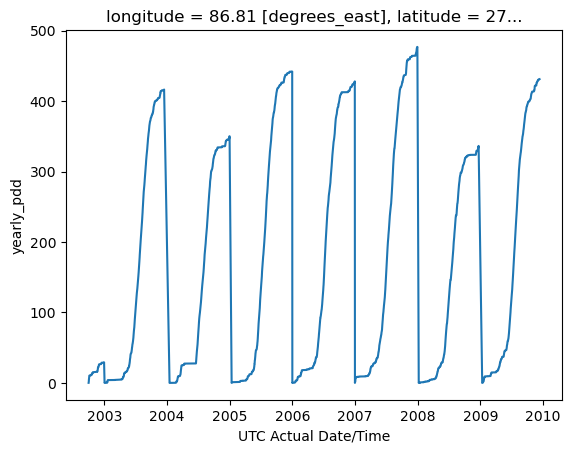

In [78]:
temp_ds_positive['yearly_pdd'].plot()

In [73]:
yearly_positive_degree_hours.time

<xarray.DataArray 'time' (time: 23874)> Size: 191kB
array([    0,     1,     2, ..., 23871, 23872, 23873])
Coordinates:
    longitude  float64 8B 86.81
    latitude   float64 8B 27.96
    altitude   float64 8B 5.035e+03
Dimensions without coordinates: time

In [48]:
temp_ds.isel(time=0).air_temperature_C

<xarray.DataArray 'air_temperature_C' ()> Size: 8B
array(-1.26)
Coordinates:
    longitude  float64 8B 86.81
    latitude   float64 8B 27.96
    altitude   float64 8B 5.035e+03
    time       datetime64[ns] 8B 2002-10-01